## Summarizing cis eQTLs results

In [1]:
library(data.table)
library(ggplot2)
library(qvalue)
library(pheatmap)
library(gridExtra)
library(dplyr)
library(reshape2)


Attaching package: ‘dplyr’

The following object is masked from ‘package:gridExtra’:

    combine

The following objects are masked from ‘package:data.table’:

    between, first, last

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Attaching package: ‘reshape2’

The following objects are masked from ‘package:data.table’:

    dcast, melt



In [2]:
#cts=read.table('../sldp/cell.types')$V1
cts=c('PBMC', 'B', 'cM', 'ncM', 'Th', 'Tc', 'cDC', 'MK', 'NK')
cts

[1] "PBMC" "B"    "cM"   "ncM"  "Th"   "Tc"   "cDC"  "MK"   "NK"

In [7]:
load_data <- function(ct, dir){
    res=fread(paste(dir, ct, '.empirical.pval.txt', sep=''))
    res$FDR=qvalue(res$Empirical)$qvalues
    qtls=fread(paste(dir, ct, '.all.results.txt', sep=''))
    

 #   best=res[!duplicated(res$gene), ]
    return(list(all=qtls, emp=res))
}

load_data_res <- function(ct, dir){
#    res=fread(paste(dir, ct, '.empirical.pval.txt', sep=''))
#    res$FDR=qvalue(res$Empirical)$qvalues
    qtls=fread(paste(dir, ct, '.all.results.txt', sep=''))
    

 #   best=res[!duplicated(res$gene), ]
    return(list(all=qtls))
}

dir='/ye/yelabstore3/10x.lupus/eqtls/v5/sle.10pcs/all/'
sle=list()
for(ct in cts){
    print(ct)
    sle[[ct]]=load_data(ct, dir)
}

sle[['PBMC']]

sle_subtract=list()
for(ct in cts[-1]){
    sle_subtract[[ct]]=load_data_res(ct, '/ye/yelabstore3/10x.lupus/eqtls/sle.10pcs.subtracted/all/')
}

sle_minus=list()
for(ct in cts[-1]){
    sle_minus[[ct]]=load_data_res(ct, '/ye/yelabstore3/10x.lupus/eqtls/sle.10pcs.minus/all/')
}





[1] "PBMC"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "B"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "cM"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "ncM"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "Th"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "Tc"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "cDC"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "MK"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

[1] "NK"


Warning message in fread(paste(dir, ct, ".empirical.pval.txt", sep = "")):
“Detected 5 column names but the data has 6 columns (i.e. invalid file). Added 1 extra default column name for the first column which is guessed to be row names or an index. Use setnames() afterwards if this guess is not correct, or fix the file write command that created the file to create a valid file.”

SNP,gene,beta,t-stat,p-value,FDR
12:56401085,RPS26,-1.0827365,-38.32131,1.381417e-61,1.680535e-56
22:42463814,SMDT1,0.3987527,34.29389,4.211888e-57,1.515203e-53
22:42466950,SMDT1,0.3987527,34.29389,4.211888e-57,1.515203e-53
22:42475703,SMDT1,-0.3987527,-34.29389,4.211888e-57,1.515203e-53
22:42476754,SMDT1,-0.3987527,-34.29389,4.211888e-57,1.515203e-53
22:42484466,SMDT1,-0.3987527,-34.29389,4.211888e-57,1.515203e-53
22:42487900,SMDT1,-0.3987527,-34.29389,4.211888e-57,1.515203e-53
22:42488160,SMDT1,-0.3987527,-34.29389,4.211888e-57,1.515203e-53
22:42490600,SMDT1,-0.3987527,-34.29389,4.211888e-57,1.515203e-53
22:42492063,SMDT1,-0.3987527,-34.29389,4.211888e-57,1.515203e-53


In [4]:
#get unique number of eQTLs in all cell types
unique.qtls=c()
df.cts=NULL
max.pv=list()
for(c in cts[-1]){
    print(c)
    emp=sle[[c]]$emp
    qtls=emp[which(emp$FDR < 0.1),]$Actual
    genes=sapply(strsplit(as.character(qtls), '_'), '[', 2)
    qtls=sle[[c]]$all[match(genes, sle[[c]]$all$gene), ]
    qtls$id=paste(qtls$SNP, qtls$gene, sep='_')
    max.pv[[c]]=max(qtls$"p-value")
    
    pbmc=sle[['PBMC']]$all
    pbmc$id=paste(pbmc$SNP, pbmc$gene, sep='_')
    pbmc=pbmc[match(qtls$id,pbmc$id ), ]
   
    df=data.frame(id=qtls$gene, ct=qtls$beta, pbmc=pbmc$beta, ct_se=qtls$beta/qtls$"t-stat", pbmc_se=pbmc$beta/pbmc$"t-stat", cell=c)
    df.cts=rbind(df.cts, df)
    
    print(length(genes))
    unique.qtls=c(unique.qtls, genes)
    
}

unique.qtls=unique(unique.qtls)
print('unique QTLs')
print(length(unique.qtls))

[1] "B"
[1] 538
[1] "cM"
[1] 1686
[1] "ncM"
[1] 889
[1] "Th"
[1] 1118
[1] "Tc"
[1] 1180
[1] "cDC"
[1] 337
[1] "MK"
[1] 39
[1] "NK"
[1] 403
[1] "unique QTLs"
[1] 3092


In [8]:
df.cts.subtract=NULL

c='PBMC'
emp=sle[[c]]$emp
qtls=emp[which(emp$FDR < 0.1),]$Actual
genes=sapply(strsplit(as.character(qtls), '_'), '[', 2)
qtls=sle[[c]]$all[match(genes, sle[[c]]$all$gene), ]
qtls$id=paste(qtls$SNP, qtls$gene, sep='_')
max.pv[[c]]=max(qtls$"p-value")


for(c in cts[-1]){
    print(c)
    emp=sle[[c]]$emp
    qtls=emp[which(emp$FDR < 0.1),]$Actual
    genes=sapply(strsplit(as.character(qtls), '_'), '[', 2)
    qtls=sle[[c]]$all[match(genes, sle[[c]]$all$gene), ]
    qtls$id=paste(qtls$SNP, qtls$gene, sep='_')
#    max.pv[[c]]=max(qtls$"p-value")
    
    
    ct_minus=sle_minus[[c]]$all
    ct_minus$id=paste(ct_minus$SNP, ct_minus$gene, sep='_')
    ct_minus=ct_minus[match(qtls$id,ct_minus$id ), ]
#    print(head(qtls))
#    print(head(ct_subtract))
    print(cor(qtls$beta, ct_minus$beta))
    df=data.frame(id=qtls$gene, ct=qtls$beta, ct_subtract=ct_minus$beta, ct_se=qtls$beta/qtls$"t-stat", ct_subtract_se=ct_minus$beta/ct_minus$"t-stat", cell=c)
    df.cts.subtract=rbind(df.cts.subtract, df)
    
    print(length(genes))
    print(length(which(ct_minus$"p-value" < 0.05 )))

#    unique.qtls=c(unique.qtls, genes)
    
}

#unique.qtls=unique(unique.qtls)
#print('unique QTLs')
#print(length(unique.qtls))

[1] "B"
[1] 0.8100103
[1] 538
[1] 382
[1] "cM"
[1] 0.8415723
[1] 1686
[1] 1062
[1] "ncM"
[1] 0.8535269
[1] 889
[1] 656
[1] "Th"
[1] 0.7890565
[1] 1118
[1] 823
[1] "Tc"
[1] 0.866888
[1] 1180
[1] 838
[1] "cDC"
[1] 0.8380622
[1] 337
[1] 263
[1] "MK"
[1] 0.6929401
[1] 39
[1] 31
[1] "NK"
[1] 0.7099282
[1] 403
[1] 310



   B   cM  ncM   Th   Tc  cDC   MK   NK 
 538 1686  889 1118 1180  337   39  403 
        id         ct ct_subtract      ct_se ct_subtract_se cell
1    RPS26 -1.6141482  -1.0593332 0.05121171    0.027547187    B
2 HLA-DQA2  3.0761348   2.6040428 0.14738072    0.127422411    B
3    SMDT1 -0.5336122  -0.3902975 0.02622083    0.014500540    B
4     RPL8  0.2050198   0.1112102 0.01241074    0.007122748    B
5     EAF2 -0.4407388  -0.0101106 0.02721578    0.016687263    B
6 HLA-DRB1  0.4713053   0.2471830 0.02966800    0.034120129    B
$B
[1] 0.0001499762

$cM
[1] 0.0006143935

$ncM
[1] 0.0002802314

$Th
[1] 0.0003461395

$Tc
[1] 0.0004084893

$cDC
[1] 8.62522e-05

$MK
[1] 5.002173e-06

$NK
[1] 0.0001064974

$PBMC
[1] 0.0016441



png 
  2

Warning message:
“Removed 183 rows containing missing values (geom_point).”Warning message:
“Removed 45 rows containing missing values (geom_text).”

,id,ct,ct_subtract,ct_se,ct_subtract_se,cell
5792,CD3E,0.8406470,-0.02301701,0.05564839,0.01364604,NK
5794,HLA-DQA2,0.9538542,2.96415680,0.06668527,0.14774645,NK
5797,FAM184B,-0.4128223,-0.99177771,0.03131050,0.04590862,NK
5800,MYOM2,1.5543884,0.39241053,0.13174646,0.06758359,NK
5801,S100B,1.5984132,0.63231355,0.13603774,0.09786706,NK
5807,GBP7,0.2848473,0.88416570,0.02649943,0.03829788,NK
5826,HLA-DRB5,-0.5699133,-1.40503076,0.06333087,0.07813909,NK
5846,CHI3L2,0.6592045,0.15066760,0.08392810,0.05042786,NK
5970,PTGDS,0.6477693,0.07644015,0.12249595,0.10548946,NK
6054,SLC2A14,0.1501643,1.07078980,0.03318603,0.13990623,NK


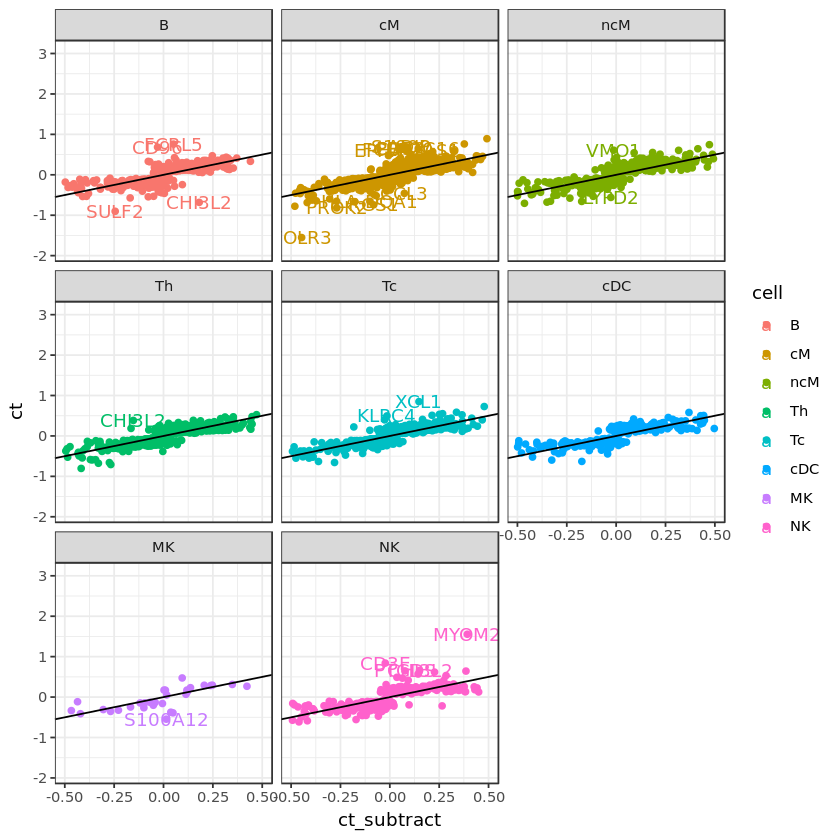

In [12]:
print(table(df.cts.subtract$cell))
print(head(df.cts.subtract))
print(max.pv)

pdf('figures/celltype.minus.betas.pdf', useDingbats = F)
ggplot(df.cts.subtract, aes(x=ct_subtract, y=ct, color=cell)) + geom_point() + facet_wrap(~ cell) + geom_abline(slope=1) + theme_bw() + geom_text(data=subset(df.cts.subtract,  abs(ct - ct_subtract) > 0.75),aes(x=ct_subtract, y=ct, label=id))
dev.off()

ggplot(df.cts.subtract, aes(x=ct_subtract, y=ct, color=cell)) + geom_point() + xlim(-0.5, 0.5) + facet_wrap(~ cell) + geom_abline(slope=1) + theme_bw() + geom_text(data=subset(df.cts.subtract,  abs(ct - ct_subtract) > 0.5),aes(x=ct_subtract, y=ct, label=id))

df.cts.subtract[abs(df.cts.subtract$ct - df.cts.subtract$ct_subtract) > 0.5 & df.cts.subtract$cell=='NK', ]

#ggplot(df.cts, aes(x=pbmc, y=ct, color=cell)) + geom_point() + facet_wrap(~ cell) + geom_abline(slope=1) + theme_bw() + geom_text(data=subset(df.cts,  abs(ct - pbmc) > 0.3),aes(x=pbmc, y=ct, label=id))
#ggplot(df.cts, aes(x=pbmc_se, y=ct_se, color=cell)) + geom_point() + facet_wrap(~ cell) + geom_abline(slope=1) + theme_bw() +geom_text(data=subset(df.cts,  pbmc_se - ct_se > 0.05),aes(x=pbmc_se, y=ct_se, label=id))
#ggplot(df.cts, aes(x=pbmc_se, y=ct_se, color=cell)) + geom_point() + facet_wrap(~ cell) + geom_abline(slope=1) + theme_bw() +geom_text(data=subset(df.cts,  id=='ICAM3'),aes(x=pbmc_se, y=ct_se, label=id))

In [26]:
df.cts[grep('ICAM3', df.cts$id), ]

,id,ct,pbmc,ct_se,pbmc_se,cell
814,ICAM3,-0.1987427,-0.06006631,0.02723299,0.01571325,cM
2488,ICAM3,-0.2120513,-0.06006631,0.03678515,0.01571325,ncM


In [109]:
het.snps=c()
all.snps=c()
het.snps.id=c()
all.snps.id=c()

for(ct in cts[-1]){
    ct.res=sle[[ct]]$all
    ct.sig=ct.res[which(ct.res$"p-value" < max.pv[[ct]]), ]
    all.snps=c(all.snps, ct.sig$SNP)
    all.snps.id=c(all.snps.id, paste(ct.sig$SNP, ct.sig$gene, ct, sep='_'))

    ct.res=sle_subtract[[ct]]$all
    #just use same pvalue cutoff for now.. need to re-do 
    ct.sig=ct.res[which(ct.res$"p-value" < max.pv[[ct]]), ]
    
    het.snps=c(het.snps, ct.sig$SNP)
    het.snps.id=c(het.snps.id, paste(ct.sig$SNP, ct.sig$gene, ct, sep='_'))

    
}

het.snps=unique(het.snps)
all.snps=unique(all.snps)


length(het.snps)
length(all.snps)
length(het.snps.id)
length(all.snps.id)



[1] 59154

[1] 111622

[1] 131760

[1] 237438

In [113]:
length(intersect(all.snps, het.snps))
length(setdiff(all.snps, het.snps))
length(setdiff(het.snps, all.snps))

head(setdiff(het.snps, all.snps))




#head(setdiff(het.snps.id, all.snps.id), n=10)
het.snps.id[grep('1:161030806', het.snps.id)]




#pbmc 
# ct='PBMC'
# ct.res=sle[[ct]]$all
# ct.sig=ct.res[which(ct.res$"p-value" < max.pv[[ct]]), ]
# all.snps.id=c(paste(ct.sig$SNP, ct.sig$gene, ct, sep='_'))

#dist to TSS


hom=setdiff(all.snps.id, het.snps.id)


all.ids=c(het.snps.id , hom)
chr_pos=strsplit(all.ids, '_')

df=data.frame(id=all.ids, test=c(rep('het', length(het.snps.id)), rep('all', length(hom))))
df$snp=sapply(chr_pos, '[', 1)
df$gene=sapply(chr_pos, '[', 2)
df$ct=sapply(chr_pos, '[', 3)
df$chr=as.numeric(sapply(strsplit(df$snp, ':'), '[', 1))
df$pos=as.numeric(sapply(strsplit(df$snp, ':'), '[', 2))


[1] 46465

[1] 65157

[1] 12689

[1] "1:161020997" "1:161030806" "1:161032378" "1:161032596" "1:161032760"
[6] "1:161032805"

[1] "1:161030806_TSTD1_B"  "1:161030806_TSTD1_Tc"

,id,test,snp,gene,ct,chr,pos,dist_to_tss
131761,6:32609545_HLA-DQA2,all,6:32609545,HLA-DQA2,B,6,32609545,-99618
131762,6:32610401_HLA-DQA2,all,6:32610401,HLA-DQA2,B,6,32610401,-98762
131763,4:151972546_RPS3A,all,4:151972546,RPS3A,B,4,151972546,-48179
131764,4:151974908_RPS3A,all,4:151974908,RPS3A,B,4,151974908,-45817
131765,4:151978470_RPS3A,all,4:151978470,RPS3A,B,4,151978470,-42255
131766,4:151981527_RPS3A,all,4:151981527,RPS3A,B,4,151981527,-39198
131767,4:151982349_RPS3A,all,4:151982349,RPS3A,B,4,151982349,-38376
131768,4:151984034_RPS3A,all,4:151984034,RPS3A,B,4,151984034,-36691
131769,4:151994154_RPS3A,all,4:151994154,RPS3A,B,4,151994154,-26571
131770,4:152002915_RPS3A,all,4:152002915,RPS3A,B,4,152002915,-17810


[1] 0

id,test,snp,gene,ct,chr,pos,dist_to_tss
19:54793239_LILRA3,het,19:54793239,LILRA3,B,19,54793239,-6616
19:54809343_LILRA3,het,19:54809343,LILRA3,B,19,54809343,9488
1:89648082_GBP7,het,1:89648082,GBP7,B,1,89648082,50648
1:89649824_GBP7,het,1:89649824,GBP7,B,1,89649824,52390
1:89653720_GBP7,het,1:89653720,GBP7,B,1,89653720,56286
20:62630149_LINC00176,het,20:62630149,LINC00176,B,20,62630149,-35548


[1] 54799855 54799855 89597434 89597434 89597434 62665697

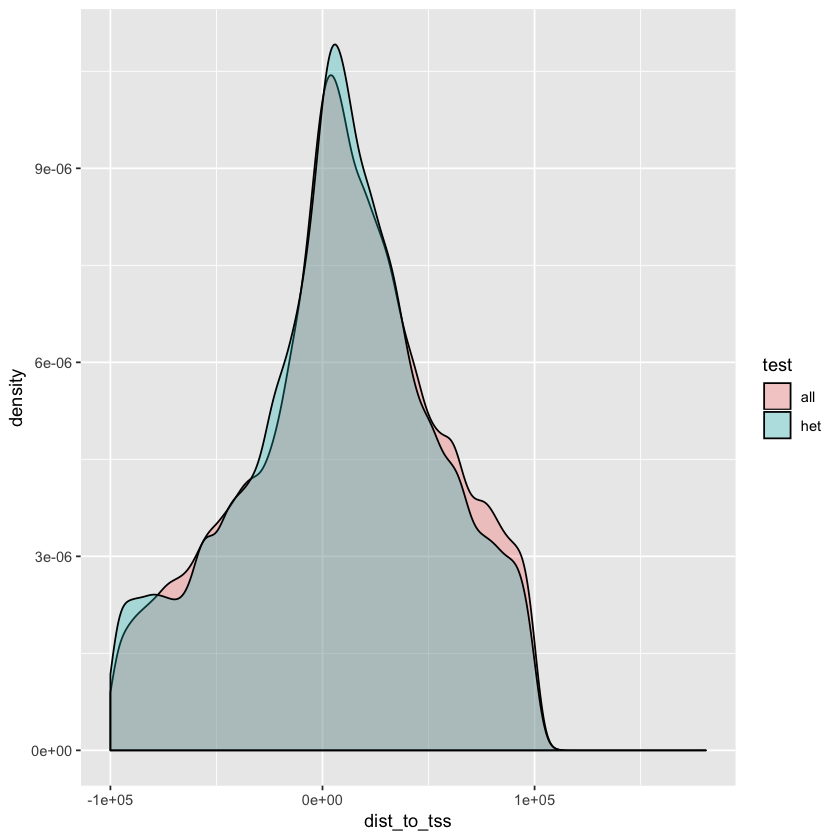

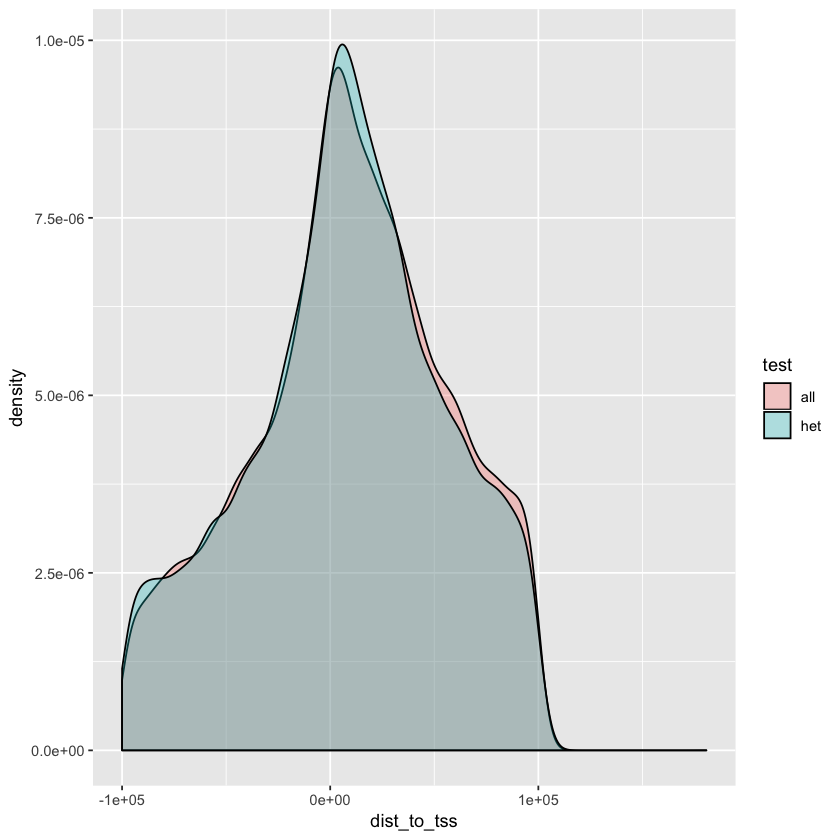

In [118]:
dists=read.table('~/Documents/lupus_paper/figure4/eqtls/v5/expressions.meta.matrix.eqtl.txt', header=T)
df$dist_to_tss=df$pos-dists$start[match(df$gene, dists$name)]
df$id=paste(df$snp, df$gene, sep='_')

df.all=df[df$test=='all', ]
df.het=df[df$test=='het', ]


#unique_ids=c(unique(df$id[df$test=='all']), unique(df$id[df$test=='het']))


df.unique=rbind(df.all[match(unique(df.all$id), df.all$id),], df.het[match(unique(df.het$id), df.het$id), ])

df.unique.all=df.unique[df.unique$test=='all', ]
df.unique.het=df.unique[df.unique$test=='het', ]

length(which(df.unique.all %in% df.unique.het))
head(df)
head(dists$start[match(df$gene, dists$name)])
ggplot(df, aes(x=dist_to_tss, fill=test)) + geom_density(alpha=0.3)
ggplot(df.unique, aes(x=dist_to_tss, fill=test)) + geom_density(alpha=0.3)

In [64]:
pbmc=sle[['PBMC']]$all
pbmc$id=paste(pbmc$SNP, pbmc$gene, sep='_')


pbmc.bulk=fread('~/Downloads/2012-12-21-CisAssociationsProbeLevelFDR0.5.txt')

pbmc.bulk=pbmc.bulk[which(pbmc.bulk$FDR < 0.05), ]

#lift over from hg18 to hg19
coords=fread('~/Downloads/hglft_genome_6f27_5011b0.bed')
coords$new=paste(coords$V4, coords$V3, sep=':')
coords$old=paste(coords$V4, coords$V5, sep=':')

pbmc.bulk$coord=paste(pbmc.bulk$SNPChr, pbmc.bulk$SNPChrPos, sep=':')
pbmc.bulk$coord_new=coords$new[match(pbmc.bulk$coord, coords$old)]

pbmc.bulk$id=paste(pbmc.bulk$coord_new, pbmc.bulk$HUGO, sep='_')

pbmc.bulk.use=pbmc.bulk[match(pbmc$id, pbmc.bulk$id), ]
pbmc.bulk.use=pbmc.bulk.use[!is.na(pbmc.bulk.use$id), ]

In [88]:

assignCT <- function(ct, bulk){    
    ct.res=sle[[ct]]$all
    ct.sig=ct.res[which(ct.res$"p-value" < max.pv[[ct]]), ]

    
    ct.sig.id=paste(ct.sig$SNP, ct.sig$gene, sep='_')
    
#    ct.sig.use=ct.sig[match(bulk$id, ct.sig.id), ]
    print('snps')
    print(length(intersect(ct.sig.id, bulk$id)))
    print('genes')
    print(length(unique(intersect(ct.sig$gene, bulk$HUGO))))
    
    return(pbmc.bulk.use$id %in% ct.sig.id)
    
}


In [148]:
print('total SNPS')
print(nrow(pbmc.bulk.use))
print('total genes')
print(length(unique(pbmc.bulk.use$HUGO)))
ct.specific.snps=list()


mat=matrix(0, nrow=nrow(pbmc.bulk.use), ncol=length(cts[-1]))
for(i in 1:length(cts[-1])){
    ct=cts[-1][i]
    print(ct)
    mat[, i]=assignCT(ct, pbmc.bulk.use)

}

mat=data.frame(mat)
rownames(mat)=pbmc.bulk.use$id
colnames(mat)=cts[-1]
mat$n_ct=rowSums(mat)



[1] "total SNPS"
[1] 163306
[1] "total genes"
[1] 3812
[1] "B"
[1] "snps"
[1] 2867
[1] "genes"
[1] 270
[1] "cM"
[1] "snps"
[1] 11380
[1] "genes"
[1] 943
[1] "ncM"
[1] "snps"
[1] 5185
[1] "genes"
[1] 483
[1] "Th"
[1] "snps"
[1] 6225
[1] "genes"
[1] 569
[1] "Tc"
[1] "snps"
[1] 6570
[1] "genes"
[1] 608
[1] "cDC"
[1] "snps"
[1] 1568
[1] "genes"
[1] 176
[1] "MK"
[1] "snps"
[1] 72
[1] "genes"
[1] 14
[1] "NK"
[1] "snps"
[1] 2262
[1] "genes"
[1] 225


,B,cM,ncM,Th,Tc,cDC,MK,NK,n_ct
9:37422656_GRHPR,1,1,1,1,1,1,0,1,7
21:46328099_ITGB2,1,1,1,1,1,1,0,1,7
12:10132283_CLEC12A,0,1,1,1,0,1,0,0,4
21:30402024_CCT8,1,1,1,1,1,1,0,1,7
16:28837515_TUFM,1,1,1,1,1,1,0,1,7
16:28857645_TUFM,1,1,1,1,1,1,0,1,7


B    cM   ncM    Th    Tc   cDC    MK    NK  n_ct 
 2867 11380  5185  6225  6570  1568    72  2262 36129

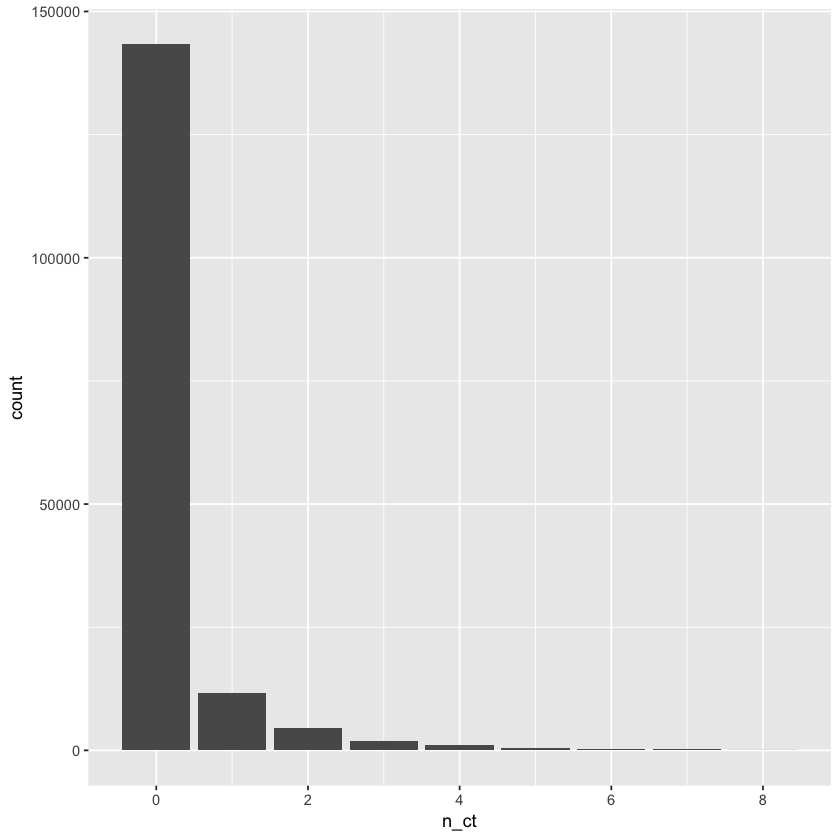

In [156]:
head(mat)
ggplot(mat, aes(x=n_ct, fill=cM))+ geom_bar()

colSums(mat)





In [20]:
#ct.specific.ids=ct.specific.snps
ct.specific.snps.pos=lapply(ct.specific.snps, function(x){return(sapply(strsplit(x, '_'), '[', 1))})
#ct.specific.snps[['CD4.T.cells']]
#ct.specific.ids[['B.cells']]


for(ct in cts[-1]){
    print(ct)
    print(length(ct.specific.snps[[ct]]))
    chr=sapply(strsplit(ct.specific.snps.pos[[ct]], ':'), '[', 1)
    pos=as.numeric(sapply(strsplit(ct.specific.snps.pos[[ct]], ':'), '[', 2))

    write.table(data.frame(paste('chr', chr, sep=''), pos-1, pos), paste(ct, '.specific.snps.bed', sep=''), row.names=F, col.names=F, quote=F, sep='\t')
}



[1] "B"
[1] 1943
[1] "CD14 Mono"
[1] 5859
[1] "CD16 Mono"
[1] 611
[1] "CD4+ T"
[1] 345
[1] "CD8+ T"
[1] 390
[1] "cDC"
[1] 221
[1] "MK"
[1] 34
[1] "NK"
[1] 632
[1] "Prolif T"
[1] 71


In [31]:
#ct.specific.snps[['CD8.T.cells']][grep('12:56369506', ct.specific.snps[['CD8.T.cells']])]
head(ct.specific.snps[['B']])

[1] "3:121481716_EAF2" "3:121481801_EAF2" "3:121483254_EAF2" "3:121483363_EAF2"
[5] "3:121484660_EAF2" "3:121484822_EAF2"

In [30]:
bentham_sle=fread('~/Documents/archive/lupus_paper/figure4/eqtls/bentham_2015_gwas.sumstats')
#head(bentham_sle)
bentham_sle$snp=paste(bentham_sle$chrom, bentham_sle$pos, sep=':')
gwas.snps=bentham_sle$snp
gwas.sig=bentham_sle$snp[which(bentham_sle$p < 1e-8)]


all.gwas=-log10(sort(bentham_sle$p, decreasing=F, na.last=T))
cd4.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% ct.specific.snps[['B']])], decreasing = F,na.last = T))
cd14.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% ct.specific.snps[['CD14 Mono']])], decreasing = F,na.last = T))


#shared.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% shared.sig)], decreasing = F,na.last = T))


exp=c(-log10(1:nrow(bentham_sle)/nrow(bentham_sle)), -log10(1:length(cd4.gwas)/length(cd4.gwas)), -log10(1:length(cd14.gwas)/length(cd14.gwas)))

df=data.frame(exp=exp, obs=c(all.gwas, cd4.gwas, cd14.gwas), val=c(rep('all GWAS', length(gwas.snps)), rep('B', length(cd4.gwas)), rep('CD14', length(cd14.gwas))))

#png('all.gwas.png')
ggplot(df,aes(x=exp, y=obs, color=val)) + geom_point() + geom_abline(slope=1)







ERROR: Error in data.frame(exp = exp, obs = c(all.gwas, cd4.gwas, cd14.gwas), : arguments imply differing number of rows: 7915255, 7915251


In [128]:
ct.check='CD14 Mono'
snps=intersect(ct.specific.snps.pos[[ct.check]],gwas.snps[which(bentham_sle$p < 1e-4)] )
if(length(snps > 0)){
    ct.specific.snps[[ct.check]][grep(paste(snps, collapse='|'), ct.specific.snps[[ct.check]])]

}


[1] "6:31609813_CSNK2B" "6:32159956_PBX2"   "6:32165444_PBX2"

In [74]:
gwas_cat=fread('~/Downloads/gwas_catalog_v1.0-associations_e93_r2018-12-21.tsv')
gwas_cat$id=paste(gwas_cat$CHR_ID, gwas_cat$CHR_POS, sep=':')
gwas_cat$

In [126]:
gwas_cat[grep('IER3', gwas_cat$"REPORTED GENE(S)"),][3,]$"REPORTED GENE(S"

[1] "MAP3K1, ANKRD55, SETD9, MIER3"

   ### Get overlap of eQTLs between cell types

          ind
values     Dendritic.cells PBMC CD8.T.cells FCGR3A+.Monocytes Megakaryocytes
  A1BG                   0    1           1                 1              0
  A1BG-AS1               0    1           0                 0              0
  A2M-AS1                0    1           1                 0              0
  AAAS                   0    0           0                 1              0
  AAED1                  0    1           0                 0              0
  AAGAB                  0    1           0                 0              0
          ind
values     CD4.T.cells NK.cells B.cells CD14+.Monocytes
  A1BG               0        0       1               1
  A1BG-AS1           0        0       0               0
  A2M-AS1            1        1       0               1
  AAAS               0        0       0               0
  AAED1              1        0       0               0
  AAGAB              0        0       0               1


[1] "Dendritic.cells"   "PBMC"              "CD8.T.cells"      
[4] "FCGR3A+.Monocytes" "Megakaryocytes"    "CD4.T.cells"      
[7] "NK.cells"          "B.cells"           "CD14+.Monocytes"

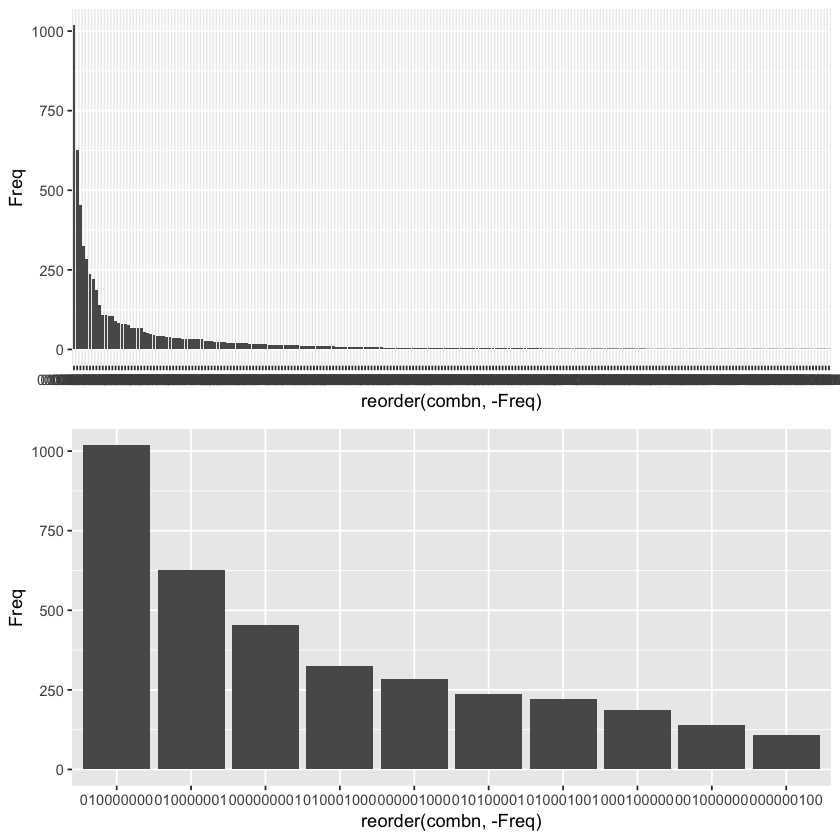

In [4]:
best.qtls=lapply(sle, function(x){
    snps=x$all[which(x$all$FDR < 0.05), ]
    genes=unique(snps$gene)
    return(genes)
})

overlap=crossprod(table(stack(best.qtls)))
diag(overlap)=0

qtl.tab=table(stack(best.qtls))
print(head(qtl.tab))
sig.qtl<-apply(qtl.tab,1,paste,collapse='')
tab.sig.qtl=table(sig.qtl)

tab.df.qtl=data.frame(combn=as.factor(names(tab.sig.qtl)), tab.sig.qtl)
tab.df.sorted.qtl=tab.df.qtl[order(tab.df.qtl$Freq, decreasing=T),][1:10, ]


plt1=ggplot(tab.df.sorted.qtl, aes(x=reorder(combn, -Freq), y=Freq))+ geom_bar(stat='identity')
plt2=ggplot(tab.df.qtl, aes(x=reorder(combn, -Freq), y=Freq))+ geom_bar(stat='identity')
colnames(qtl.tab)
grid.arrange(plt2, plt1)

Table with number of eQTL genes

In [6]:
colSums(table(stack(best.qtls)))

#number of eQTLs total compared to just PBMC
npbmc=which(table(stack(best.qtls))[, 2] > 0)
nct=which(rowSums(table(stack(best.qtls))[, -2]) > 0)
print(paste('number of total eQTLs from PBMCs', length(npbmc)))
print(paste('number of total eQTLs from cell types', length(nct)))

unique.ct=length(setdiff(nct, npbmc))
unique.pbmc=length(setdiff(npbmc, nct))

print(paste('number of eQTLs found only in individual cell types', unique.ct))
print(paste('number of eQTLs found only in PBMCs', unique.pbmc))
                    

Dendritic.cells              PBMC       CD8.T.cells FCGR3A+.Monocytes 
              654              4661              1260              1482 
   Megakaryocytes       CD4.T.cells          NK.cells           B.cells 
              267              2210               986              1042 
  CD14+.Monocytes 
             3070

[1] "number of total eQTLs from PBMCs 4661"
[1] "number of total eQTLs from cell types 5445"
[1] "number of eQTLs found only in individual cell types 1802"
[1] "number of eQTLs found only in PBMCs 1018"


PBMC eQTLs overlap most with CD4 and CD14 eQTLs as expected

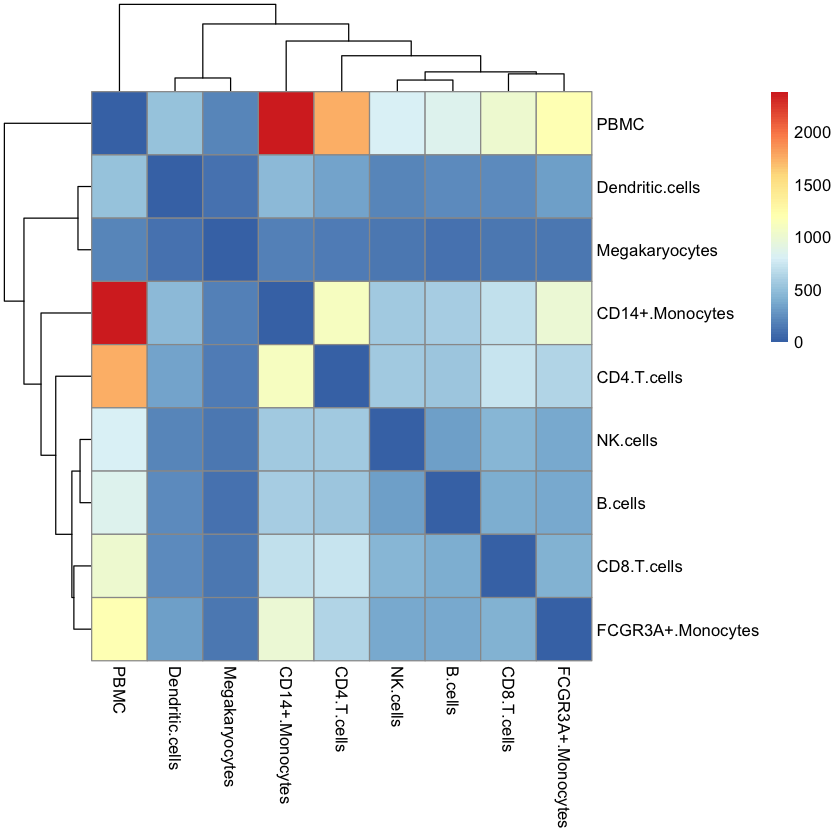

In [39]:
pheatmap(overlap)

In [7]:
#get pairwise overlap of concordant effect sizes, at snp level
mat=matrix(0, ncol=length(cts), nrow=length(cts))
for(i in seq(length(cts))){
    for(j in seq(length(cts))){
        ct1=cts[i]
        ct2=cts[j]
        print(ct1)
        print(ct2)
        ct1.id=paste(sle[[ct1]]$all$SNP, sle[[ct1]]$all$gene, sep='_')
        ct2.id=paste(sle[[ct2]]$all$SNP, sle[[ct2]]$all$gene, sep='_')
        ct1.beta=sle[[ct1]]$all$beta
        ct2.beta=sle[[ct2]]$all$beta[match(ct1.id, ct2.id)]
        ct1.se=ct1.beta/sle[[ct1]]$all$"t-stat"
        ct2.se=ct2.beta/sle[[ct2]]$all$"t-stat"[match(ct1.id, ct2.id)]
        tscore=(ct1.beta - ct2.beta)/sqrt(ct1.se**2 + ct2.se**2)
        pvals=2*pt(-abs(tscore), df=119-1)
        mat[i, j]=length(which(p.adjust(pvals) < 0.05))                    
 }   
}
    
head(mat)
    
#tscore=b.sle-b2.healthy/sqrt(se.sle**2 + se.healthy**2)
#pvals=pt(tscore, df=46-1)

[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] PBMC
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] CD8.T.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] FCGR3A+.Monocytes
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Megakaryocytes
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] CD4.T.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.c

0,985,615,823,435,337,280,260,1810
985,0,762,5167,3737,3873,2877,941,1312
615,762,0,3470,2720,2951,2490,739,2689
823,5167,3470,0,1138,89,1227,2008,2516
435,3737,2720,1138,0,251,1344,1151,3203
337,3873,2951,89,251,0,900,1103,2140


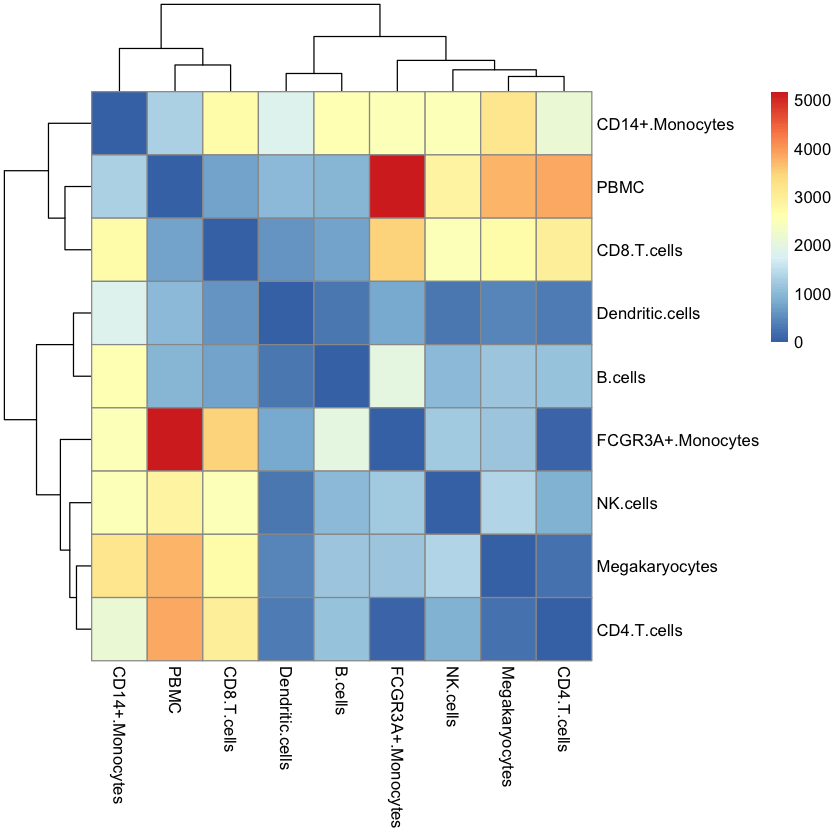

In [178]:
rownames(mat)=cts
colnames(mat)=cts
pheatmap(mat)

In [175]:
#do the same thing but best snp per gene? not sure if this makes a ton of sense

mat.gene=matrix(0, ncol=length(cts), nrow=length(cts))
for(i in seq(length(cts))){
    for(j in seq(length(cts))){
        ct1=cts[i]
        ct2=cts[j]
        print(ct1)
        print(ct2)
        ct1.id=paste(sle[[ct1]]$best$gene)
        ct2.id=paste(sle[[ct2]]$best$gene)
        ct1.beta=sle[[ct1]]$best$beta
        ct2.beta=sle[[ct2]]$best$beta[match(ct1.id, ct2.id)]
        ct1.se=ct1.beta/sle[[ct1]]$best$"t-stat"
        ct2.se=ct2.beta/sle[[ct2]]$best$"t-stat"[match(ct1.id, ct2.id)]
        tscore=(ct1.beta - ct2.beta)/sqrt(ct1.se**2 + ct2.se**2)
        pvals=2*pt(-abs(tscore), df=119-1)
        mat.gene[i, j]=length(which(p.adjust(pvals) < 0.05))                    
#        print(length(which(p.adjust(pvals) < 0.05)))
 }   
}
    
head(mat.gene)


[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] PBMC
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] CD8.T.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] FCGR3A+.Monocytes
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Megakaryocytes
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] Dendritic.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.cells CD8.T.cells ... PBMC
[1] CD4.T.cells
9 Levels: B.cells CD14+.Monocytes CD4.T.c

0,356,274,264,208,226,191,167,386
356,0,437,787,544,648,548,396,544
274,437,0,557,434,489,408,319,596
264,787,557,0,371,365,407,394,594
208,544,434,371,0,261,320,301,525
226,648,489,365,261,0,338,321,565


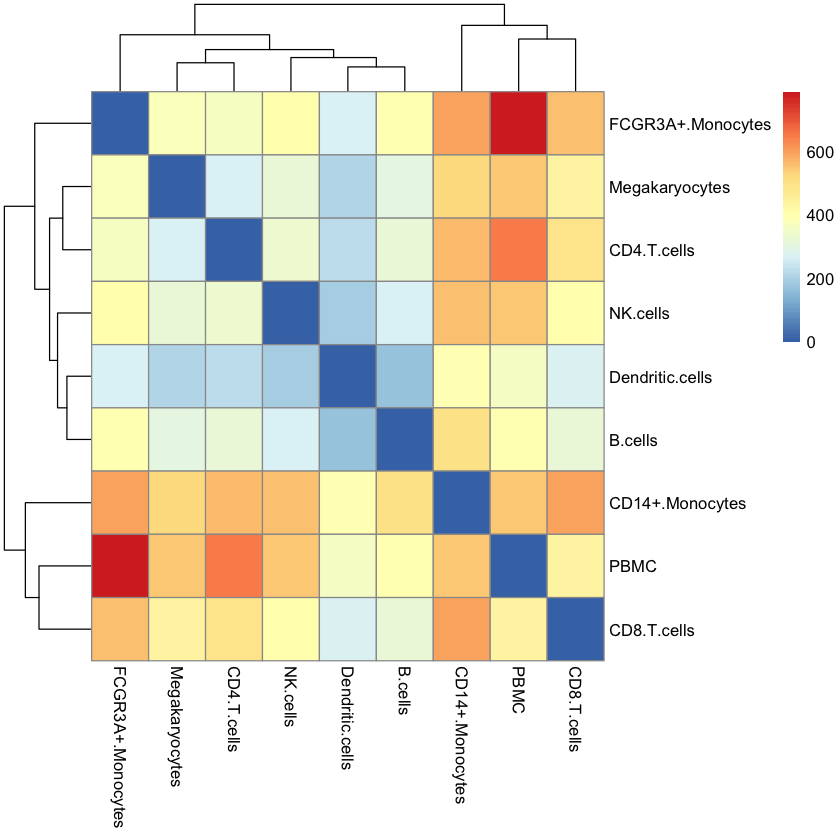

In [176]:
rownames(mat.gene)=cts
colnames(mat.gene)=cts

pheatmap(mat.gene)

###  Effect Size Comparison with PBMCs and each cell type

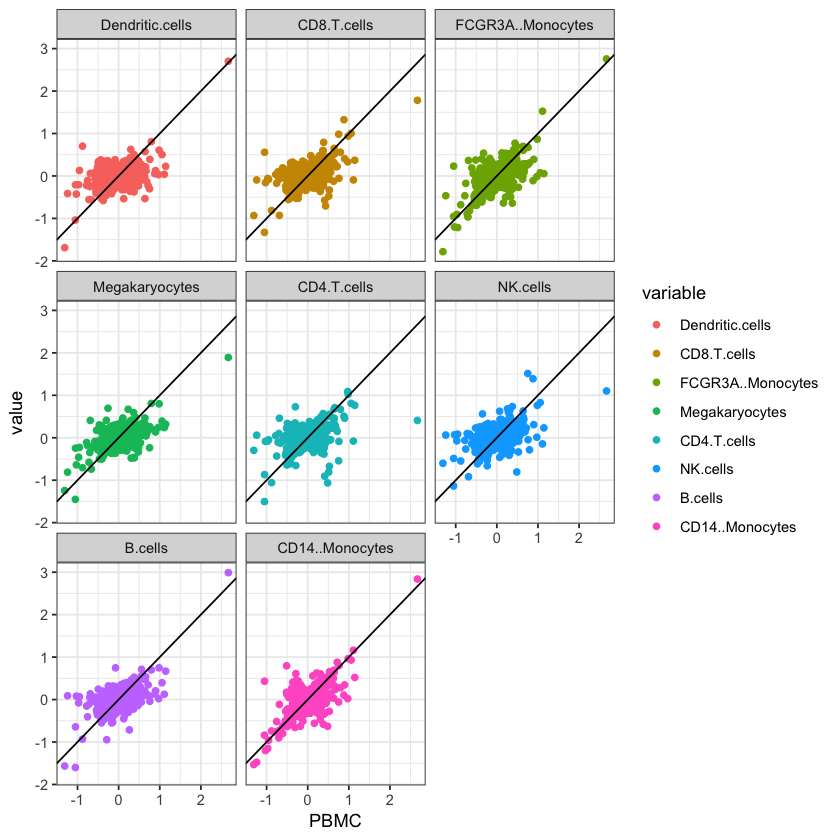

In [7]:
genes=sle[['PBMC']]$best$gene
best.beta=data.frame(sapply(sle, function(x){
    return(x$best$beta[match(genes,x$best$gene)])
}))

rownames(best.beta)=genes

df=melt(best.beta, 'PBMC')
#print(head(df))
ggplot(df, aes(x=PBMC, y=value, color=variable)) + geom_point() + facet_wrap(~ variable) + geom_abline(slope=1) + theme_bw()




Correlation of effect sizes in each cell type- effect sizes in PBMCs are most correlated with monocytes, then CD4s , lower correlation with more rare cell types

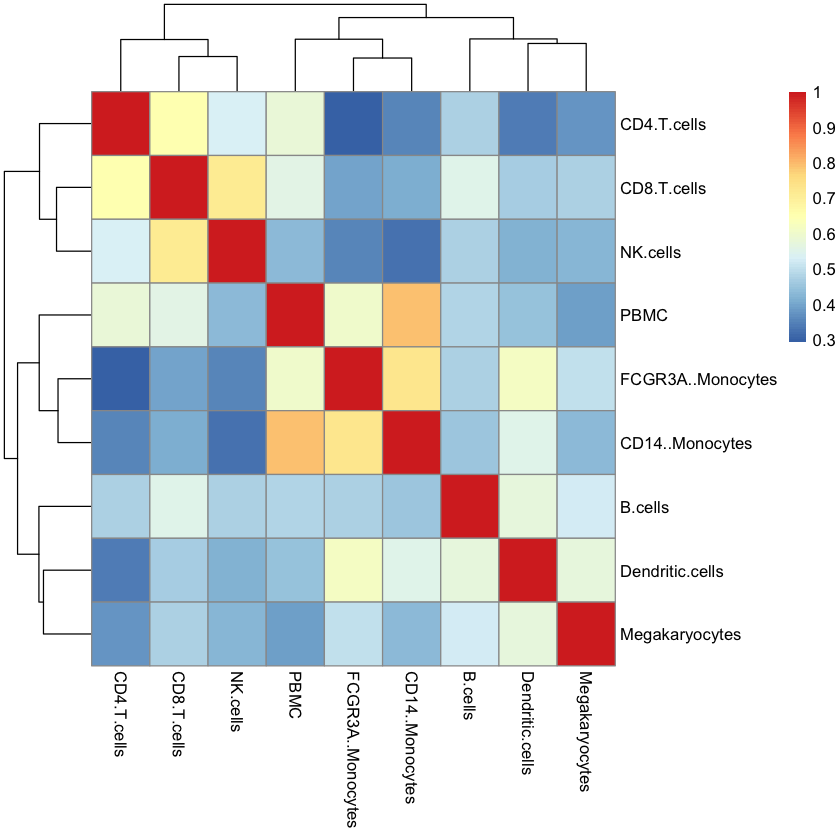

In [8]:
#cor(best.beta)

#correlation taking the absolute value (this is much better)
#cor(abs(best.beta))
pheatmap(cor(abs(best.beta)))


### Meta analysis between cell types ( need to re-do with meta tissue)

In [7]:
#load meta analysis
# all.meta=NULL
# for( i in 1:22){
#     m=fread(paste('sle/', i, '.meta.analysis', sep=''))
#     all.meta=rbind(all.meta, m)
# }

#metatissue
all.meta=fread('~/Documents/single cell/lupus_paper/figure4/eqtls/sle/all.metasoft.order.shared.txt')

Number of SNPs that have heterogeneous effect size between cell types

In [18]:
#just get everything we tested with matrixeQTL
pairs=paste(sle[['PBMC']]$all$SNP, sle[['PBMC']]$all$gene, sep=':')
meta.use=all.meta[match(pairs, all.meta$RSID), ]
meta.sortq=meta.use[order(meta.use$PVALUE_Q, decreasing=F), ]
meta.sortq$qfdr=qvalue(meta.sortq$PVALUE_Q)$qvalues
length(which(meta.sortq$qfdr < 0.05))


[1] 84690

RSID,NUM_STUDY,PVALUE_FE,PVALUE_RE2,I_SQUARE,PVALUE_Q,STDERR1,STDERR2,STDERR3,STDERR4,⋯,STDERR7,M1,M2,M3,M4,M5,M6,M7,V21,qfdr
5:132272311:LEAP2,7,0.2147390,1.75549e-26,95.7854,3.18167e-28,0.2090344,0.2122620,0.2136072,0.2138760,⋯,0.2128570,0.986,0.988,0.012,0.012,0.012,0.988,0.988,NA,7.065927e-22
5:132272311:ZCCHC10,7,0.1319000,4.68446e-26,95.6994,1.26830e-27,0.2130442,0.2101674,0.2127150,0.2132068,⋯,0.2131683,0.999,0.999,0.000,0.000,0.999,0.999,0.000,NA,7.065927e-22
1:3811790:CEP104,7,0.2590060,8.00524e-26,95.6976,1.30407e-27,0.2190648,0.2160721,0.2208201,0.2203790,⋯,0.2188257,0.959,0.957,0.041,0.959,0.959,0.041,0.041,NA,7.065927e-22
1:3811810:CEP104,7,0.2590060,8.00524e-26,95.6976,1.30407e-27,0.2190648,0.2160721,0.2208201,0.2203790,⋯,0.2188257,0.959,0.957,0.041,0.959,0.959,0.041,0.041,NA,7.065927e-22
5:132320621:ZCCHC10,7,0.1302490,5.21506e-26,95.6917,1.43118e-27,0.2128537,0.2105275,0.2129082,0.2130894,⋯,0.2131517,1.000,0.999,0.000,0.000,1.000,1.000,0.000,NA,7.065927e-22
21:47987547:PRMT2,7,0.0558926,8.58499e-26,95.6135,4.78183e-27,0.2165632,0.2201955,0.2179128,0.2192090,⋯,0.2217732,0.000,1.000,1.000,0.000,1.000,1.000,0.000,NA,1.967378e-21


In [17]:
head(meta.sortq)

RSID,NUM_STUDY,PVALUE_FE,PVALUE_RE2,I_SQUARE,PVALUE_Q,STDERR1,STDERR2,STDERR3,STDERR4,⋯,STDERR6,STDERR7,M1,M2,M3,M4,M5,M6,M7,V21
5:132272311:LEAP2,7,0.2147390,1.75549e-26,95.7854,3.18167e-28,0.2090344,0.2122620,0.2136072,0.2138760,⋯,0.2132871,0.2128570,0.986,0.988,0.012,0.012,0.012,0.988,0.988,NA
5:132272311:ZCCHC10,7,0.1319000,4.68446e-26,95.6994,1.26830e-27,0.2130442,0.2101674,0.2127150,0.2132068,⋯,0.2126414,0.2131683,0.999,0.999,0.000,0.000,0.999,0.999,0.000,NA
1:3811790:CEP104,7,0.2590060,8.00524e-26,95.6976,1.30407e-27,0.2190648,0.2160721,0.2208201,0.2203790,⋯,0.2224979,0.2188257,0.959,0.957,0.041,0.959,0.959,0.041,0.041,NA
1:3811810:CEP104,7,0.2590060,8.00524e-26,95.6976,1.30407e-27,0.2190648,0.2160721,0.2208201,0.2203790,⋯,0.2224979,0.2188257,0.959,0.957,0.041,0.959,0.959,0.041,0.041,NA
5:132320621:ZCCHC10,7,0.1302490,5.21506e-26,95.6917,1.43118e-27,0.2128537,0.2105275,0.2129082,0.2130894,⋯,0.2129826,0.2131517,1.000,0.999,0.000,0.000,1.000,1.000,0.000,NA
21:47987547:PRMT2,7,0.0558926,8.58499e-26,95.6135,4.78183e-27,0.2165632,0.2201955,0.2179128,0.2192090,⋯,0.2212203,0.2217732,0.000,1.000,1.000,0.000,1.000,1.000,0.000,NA


Number of genes with heterogeneous effect sizes

In [75]:
meta.sig=meta.sortq[which(meta.sortq$qfdr < 0.05), ]
genes=sapply(strsplit(meta.sig$RSID, ':'), '[', 3)
meta.sig$gene=genes
#snps=sapply(strsplit(meta.sig$RSID, '_'), '[', 1)
print(dim(meta.sig))
print(length(unique(genes)))

meta.sharep=qvalue(meta.sortq$PVALUE_RE2)$qvalues
meta.shared=meta.sortq[which(meta.sharep < 0.05), ]
genes=sapply(strsplit(meta.shared$RSID, ':'), '[', 3)

meta.shared$gene=genes
dim(meta.shared)
min(meta.sig$PVALUE_Q)

[1] 84690    23
[1] 5289


[1] 72819    23

[1] 3.18167e-28

In [78]:
meta.sig[which(meta.sig$M1 > 0.9), ]

RSID,NUM_STUDY,PVALUE_FE,PVALUE_RE2,I_SQUARE,PVALUE_Q,STDERR1,STDERR2,STDERR3,STDERR4,⋯,M1,M2,M3,M4,M5,M6,M7,V21,qfdr,gene
5:132272311:LEAP2,7,0.2147390,1.75549e-26,95.7854,3.18167e-28,0.2090344,0.2122620,0.2136072,0.2138760,⋯,0.986,0.988,0.012,0.012,0.012,0.988,0.988,NA,7.065927e-22,LEAP2
5:132272311:ZCCHC10,7,0.1319000,4.68446e-26,95.6994,1.26830e-27,0.2130442,0.2101674,0.2127150,0.2132068,⋯,0.999,0.999,0.000,0.000,0.999,0.999,0.000,NA,7.065927e-22,ZCCHC10
1:3811790:CEP104,7,0.2590060,8.00524e-26,95.6976,1.30407e-27,0.2190648,0.2160721,0.2208201,0.2203790,⋯,0.959,0.957,0.041,0.959,0.959,0.041,0.041,NA,7.065927e-22,CEP104
1:3811810:CEP104,7,0.2590060,8.00524e-26,95.6976,1.30407e-27,0.2190648,0.2160721,0.2208201,0.2203790,⋯,0.959,0.957,0.041,0.959,0.959,0.041,0.041,NA,7.065927e-22,CEP104
5:132320621:ZCCHC10,7,0.1302490,5.21506e-26,95.6917,1.43118e-27,0.2128537,0.2105275,0.2129082,0.2130894,⋯,1.000,0.999,0.000,0.000,1.000,1.000,0.000,NA,7.065927e-22,ZCCHC10
1:3817260:CEP104,7,0.2579040,1.16840e-24,95.5158,2.03269e-26,0.2160328,0.2132254,0.2176348,0.2170764,⋯,0.965,0.963,0.035,0.965,0.965,0.035,0.035,NA,6.374034e-21,CEP104
1:3814994:CEP104,7,0.2533570,2.02281e-24,95.4756,3.61491e-26,0.2128217,0.2103757,0.2148690,0.2136592,⋯,0.969,0.968,0.031,0.969,0.969,0.031,0.031,NA,6.374034e-21,CEP104
1:3815850:CEP104,7,0.2533570,2.02281e-24,95.4756,3.61491e-26,0.2128217,0.2103757,0.2148690,0.2136592,⋯,0.969,0.968,0.031,0.969,0.969,0.031,0.031,NA,6.374034e-21,CEP104
1:3816598:CEP104,7,0.2533570,2.02281e-24,95.4756,3.61491e-26,0.2128217,0.2103757,0.2148690,0.2136592,⋯,0.969,0.968,0.031,0.969,0.969,0.031,0.031,NA,6.374034e-21,CEP104
1:3816683:CEP104,7,0.2533570,2.02281e-24,95.4756,3.61491e-26,0.2128217,0.2103757,0.2148690,0.2136592,⋯,0.969,0.968,0.031,0.969,0.969,0.031,0.031,NA,6.374034e-21,CEP104


In [70]:
#meta.sig$gene=sapply(strsplit(meta.sig$RSID, '_'), '[', 2)
#meta.shared$gene=sapply(strsplit(meta.shared$RSID, '_'), '[', 2)

meta.sig.sorted=meta.sig[order(meta.sig$PVALUE_Q),]
meta.shared.sorted=meta.shared[order(meta.shared$PVALUE_RE2),]


#get the RSIDs/gene
#het.sig=sapply(strsplit(meta.sig.sorted$RSID[!duplicated(meta.sig.sorted$gene)], ':'), '[', 1)
het.sig=meta.sig.sorted$RSID#[!duplicated(meta.sig.sorted$gene)]
het.sig=sub('_', ':', sapply(strsplit(sub(':', '_', het.sig), ':'), '[', 1))

#remove chr 6
het.sig=het.sig[grep('^6:', het.sig, invert=T)]

#shared.sig=sapply(strsplit(meta.shared.sorted$RSID[!duplicated(meta.shared.sorted$gene)], '_'), '[', 1)
shared.sig=meta.shared.sorted$RSID#[!duplicated(meta.shared.sorted$gene)]
shared.sig=sub('_', ':', sapply(strsplit(sub(':', '_', shared.sig), ':'), '[', 1))
shared.sig=shared.sig[grep('^6:', shared.sig, invert=T)]


length(het.sig)
length(shared.sig)


[1] 77891

[1] 67410

In [51]:
#grep('IRF8', het.sig)

integer(0)

In [54]:
bentham_sle=fread('~/Documents/archive/lupus_paper/figure4/eqtls/bentham_2015_gwas.sumstats')
#head(bentham_sle)
bentham_sle$snp=paste(bentham_sle$chrom, bentham_sle$pos, sep=':')
gwas.snps=bentham_sle$snp
gwas.sig=bentham_sle$snp[which(bentham_sle$p < 1e-8)]


In [47]:
all.gwas=-log10(sort(bentham_sle$p, decreasing=F, na.last=T))
cd14=sle[['CD14+.Monocytes']]$best
cd14.snps=cd14$SNP[which(cd14$"p-value" < 1e-4)]
cd14.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% cd14.snps)], decreasing = F,na.last = T))

cd4=sle[['CD4.T.cells']]$best
cd4.snps=cd4$SNP[which(cd4$"p-value" < 1e-4)]
cd4.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% cd4.snps)], decreasing = F,na.last = T))

exp=c(-log10(1:nrow(bentham_sle)/nrow(bentham_sle)), -log10(1:length(cd14.gwas)/length(cd14.gwas)), -log10(1:length(cd4.gwas)/length(cd4.gwas)))
df=data.frame(exp=exp, obs=c(all.gwas, cd14.gwas, cd4.gwas), val=c(rep('all GWAS', length(gwas.snps)), rep('CD14', length(cd14.gwas)), rep('CD4', length(cd4.gwas))))


ggplot(df,aes(x=exp, y=obs, color=val)) + geom_point() + geom_abline(slope=1)




In [38]:
length(cd4.snps)
#what happens if you plot a random set of SNPs?? 
#what happens if you take eQTLs from an unrelated tissue? 
#height vs autoimmune GWAS 


[1] 934

SNP,gene,beta,t-stat,p-value,FDR
12:56401085,RPS26,-0.8388347,-45.34611,1.681921e-68,3.436566e-62
6:32609545,HLA-DQA2,2.8384137,25.81461,5.104731e-46,2.504840e-40
22:42475703,SMDT1,-0.3394126,-25.33823,2.574426e-45,2.504840e-40
21:46328099,ITGB2,-0.5293824,-24.68259,2.476284e-44,2.299835e-39
5:96252432,ERAP2,0.6924439,23.10687,6.844739e-42,2.219910e-37
17:7151111,ELP5,-0.4629807,-21.44826,3.405364e-39,8.920473e-35


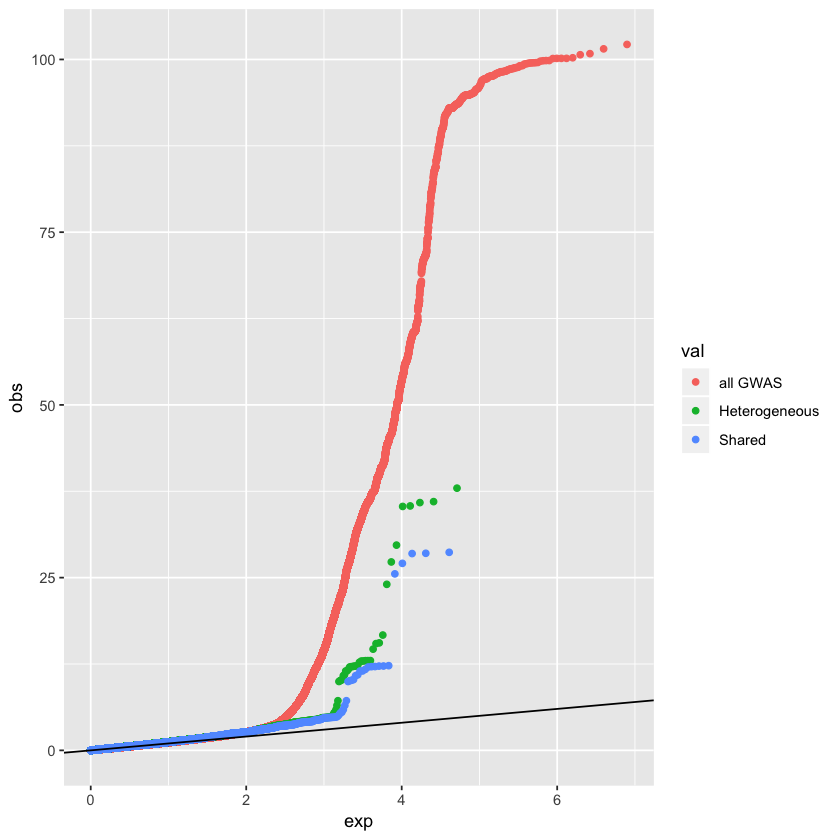

In [74]:
all.gwas=-log10(sort(bentham_sle$p, decreasing=F, na.last=T))
het.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% het.sig)], decreasing = F,na.last = T))
shared.gwas=-log10(sort(bentham_sle$p[which(gwas.snps %in% shared.sig)], decreasing = F,na.last = T))

exp=c(-log10(1:nrow(bentham_sle)/nrow(bentham_sle)), -log10(1:length(het.gwas)/length(het.gwas)), -log10(1:length(shared.gwas)/length(shared.gwas)))

df=data.frame(exp=exp, obs=c(all.gwas, het.gwas, shared.gwas), val=c(rep('all GWAS', length(gwas.snps)), rep('Heterogeneous', length(het.gwas)), rep('Shared', length(shared.gwas))))

#png('all.gwas.png')
ggplot(df,aes(x=exp, y=obs, color=val)) + geom_point() + geom_abline(slope=1)


In [71]:
length(intersect(het.sig, gwas.sig))/length(het.sig)
length(intersect(shared.sig, gwas.sig))/length(shared.sig)



[1] 0.000423669

[1] 0.0002966919

In [73]:
intersect(het.sig, gwas.sig)

[1] "5:150444212" "5:150446753" "5:150450236" "5:150451650" "5:150453384"
 [6] "5:150455672" "5:150460047" "5:150447090" "5:150447128" "5:150448376"
[11] "5:150452866" "5:150453888" "5:150456392" "5:150452553" "5:150455732"
[16] "5:159884083" "5:159886620" "5:159887976" "5:159888522" "5:159881750"
[21] "5:159882797" "5:159887336" "7:128573967" "7:128580042" "7:128580047"
[26] "7:128576086" "2:191940451" "7:128579202" "7:128579666" "7:128580680"
[31] "7:128589427" "7:128599397" "7:128602142"

In [64]:
intersect(het.sig, gwas.snps[which(bentham_sle$p < 1e-3)])

[1] "6:32609545"   "6:29915330"   "17:38026169"  "6:29606145"   "19:10447795" 
 [6] "14:100804315" "6:33036630"   "6:32612343"   "8:11450472"   "6:31579956"  
[11] "19:46896217"  "19:21908053"  "6:29688501"   "6:26468660"   "6:31237255"  
[16] "6:26377028"   "1:935459"     "8:9975604"    "3:58320984"   "17:38066509" 
[21] "6:32197219"   "16:85965595"  "19:10422972"  "11:684697"    "6:34703599"  
[26] "5:55444683"   "3:99915939"   "6:33033710"   "6:35282375"   "6:31836151"  
[31] "6:32195935"   "19:50148052"

Which cell types have the most heterogeneous effects? 

In [16]:
ids=meta.sig$RSID
#print(head(ids))
ct.betas=data.frame(sapply(sle, function(x){
    res=x$all
    res$id=paste(as.character(res$SNP), as.character(res$gene), sep='_')
    return(res$beta[match(ids,res$id)])
}))


For the SNPs that are heterogeneous, CD4 and NK effect sizes look smaller, B cells and Monocytes look bigger

In [26]:
ct.betas$meta=meta.sig$BETA_RE
df.ct.betas=melt(ct.betas, 'meta')

head(df.ct.betas)
meta.sortq$pfdr=qvalue(meta.sortq$PVALUE_RE)$qvalues
meta.pansig=meta.sortq[which(meta.sortq$pfdr < 0.05), ]

ids.pan=meta.pansig$RSID

ct.betas.pan=data.frame(sapply(sle, function(x){
    res=x$all
    res$id=paste(as.character(res$SNP), as.character(res$gene), sep='_')
    return(res$beta[match(ids.pan,res$id)])
}))
ct.betas.pan$meta=meta.pansig$BETA_RE

print(dim(ct.betas.pan))
df.bg=melt(ct.betas.pan, 'meta')
head(df.bg)

    
#ggplot(df.ct.betas, aes(x=meta, y=value, color=variable)) + geom_point() + facet_wrap(~ variable) + geom_abline(slope=1) + theme_bw()

meta,variable,value
2.08744,Dendritic.cells,2.702522
2.08744,Dendritic.cells,2.702522
1.86992,Dendritic.cells,2.733770
1.86992,Dendritic.cells,2.733770
1.86992,Dendritic.cells,2.733770
1.86992,Dendritic.cells,2.733770


[1] 247866     10


meta,variable,value
2.08744,Dendritic.cells,2.702522
2.08744,Dendritic.cells,2.702522
1.86992,Dendritic.cells,2.733770
1.86992,Dendritic.cells,2.733770
1.86992,Dendritic.cells,2.733770
1.86992,Dendritic.cells,2.733770


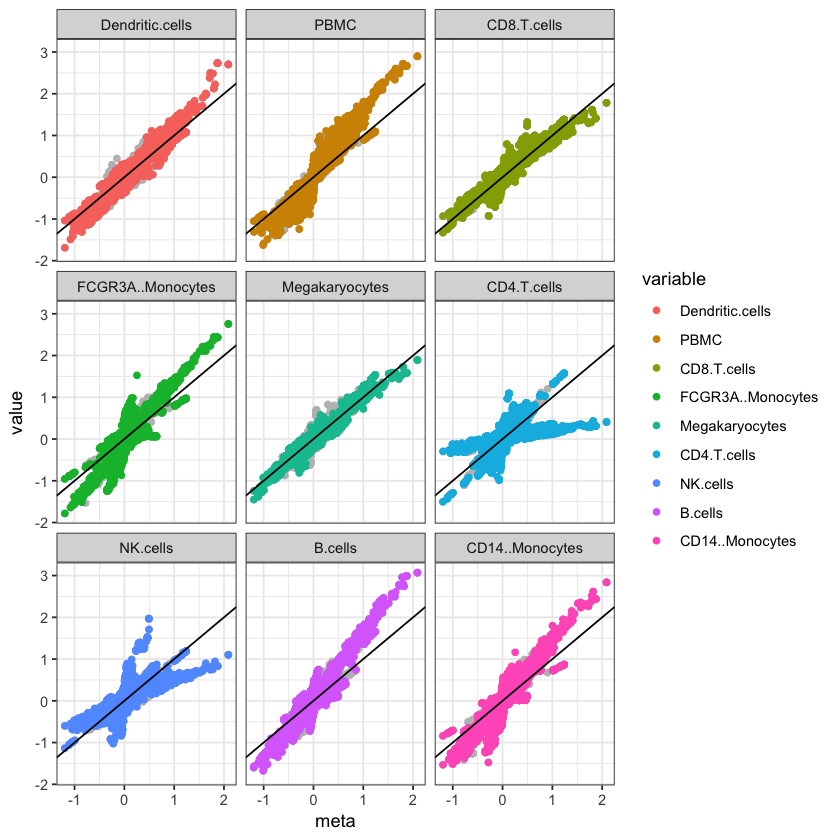

In [100]:
#ggplot(df.ct.betas, aes(x=meta, y=value, color=variable)) + geom_point() + facet_wrap(~ variable) + geom_abline(slope=1) + theme_bw()
ggplot(df.ct.betas, aes(x=meta, y=value, color=variable)) + geom_point(data=df.bg, colour="grey") +geom_point() + facet_wrap(~ variable) + geom_abline(slope=1) + theme_bw()



Meta effect sizes are least correlated with NK cells and CD4 T cells (because effect size estimates look smaller)
We get higher effect sizes in CD14+ Monocytes and B cells

In [90]:
cor(ct.betas)[,10]
#correlation of meta effect sizes to individual tissue effect sizes


Dendritic.cells              PBMC       CD8.T.cells FCGR3A..Monocytes 
        0.7689118         0.7930390         0.8175729         0.7392077 
   Megakaryocytes       CD4.T.cells          NK.cells           B.cells 
        0.8260905         0.7133587         0.7239459         0.7597772 
  CD14..Monocytes              meta 
        0.7584027         1.0000000

to quantify this: slope of effect sizes is < 1 in CD4T cells and NK cells, >1 in B cells and monocytes

In [97]:
cts.use=names(ct.betas)[-10]
for(ct in cts.use){
    print(ct)
  print(coef(summary(lm(paste(ct, '~ meta'), data=ct.betas)))[2,])
}


[1] "Dendritic.cells"
    Estimate   Std. Error      t value     Pr(>|t|) 
1.015405e+00 2.398337e-03 4.233790e+02 0.000000e+00 
[1] "PBMC"
    Estimate   Std. Error      t value     Pr(>|t|) 
  1.48561244   0.00299513 496.00925619   0.00000000 
[1] "CD8.T.cells"
    Estimate   Std. Error      t value     Pr(>|t|) 
9.778131e-01 2.305316e-03 4.241558e+02 0.000000e+00 
[1] "FCGR3A..Monocytes"
    Estimate   Std. Error      t value     Pr(>|t|) 
  1.25459343   0.00336397 372.95023273   0.00000000 
[1] "Megakaryocytes"
    Estimate   Std. Error      t value     Pr(>|t|) 
9.100307e-01 1.819268e-03 5.002181e+02 0.000000e+00 
[1] "CD4.T.cells"
    Estimate   Std. Error      t value     Pr(>|t|) 
  0.72294693   0.00330453 218.77448535   0.00000000 
[1] "NK.cells"
    Estimate   Std. Error      t value     Pr(>|t|) 
7.611794e-01 2.745958e-03 2.772000e+02 0.000000e+00 
[1] "B.cells"
    Estimate   Std. Error      t value     Pr(>|t|) 
1.202227e+00 2.949877e-03 4.075515e+02 0.000000e+00 
[1] "CD14

Plot showing comparison of effect sizes in CD4+ T cells and and CD14+ monocytes in heterogeneous effect size snps

In [ ]:
ct1='CD14..Monocytes'
ct2='CD4.T.cells'

ggplot(ct.betas, aes_string(x=ct1, y=ct2)) + geom_point() + geom_abline()


Only a little more than half (38711/62841) of the heterogeneous snps were significant in PBMCs, this suggests that there is a lot of cell type specific signal that you cannot capture in bulk

In [19]:
#get overlap of het snps with significant snps in each cell type
#print(head(ids))

common.qtls=list()
for(ct in cts){
    print(ct)
    res=sle[[ct]]$all
    res.sig=res[which(res$FDR < 0.05), ]
    res.sig$id=paste(as.character(res.sig$SNP), as.character(res.sig$gene), sep='_')
    common=intersect(res.sig$id, ids)
    common.qtls[[ct]]=common
    print(length(common))
}

[1] "Dendritic.cells"
[1] 9971
[1] "PBMC"
[1] 38711
[1] "CD8.T.cells"
[1] 14846
[1] "FCGR3A+.Monocytes"
[1] 20337
[1] "Megakaryocytes"
[1] 3791
[1] "CD4.T.cells"
[1] 20680
[1] "NK.cells"
[1] 12787
[1] "B.cells"
[1] 12594
[1] "CD14+.Monocytes"
[1] 31994


The majority of heterogeneous SNPs are only significant in one or two cell types

In [21]:
sig.cts=table(stack(common.qtls))
#print(head(sig.cts))
n.cts=data.frame(val=rowSums(sig.cts))

paste('out of ', length(ids), 'SNPs, ', nrow(sig.cts), 'are significant in at least one cell type')

#colSums(sig.cts)
df.sig.ct=melt(sig.cts)

#head(df.sig.ct)
#df.by.snp=df.sig.ct %>%group_by(ind, values) %>% summarise(n_cts = sum(value))
#dplyr is too complicated so just for use a for loop :(

snps.df=NULL


for(i in 1:ncol(sig.cts)){
    snps.use=sig.cts[which(rowSums(sig.cts)==i),]
    print(sum(colSums(snps.use)))
    print(nrow(snps.use))
    df.small=data.frame(n_cts=i, n_snps=nrow(snps.use), cts=colnames(sig.cts), prop_ct=colSums(snps.use)/i)
    snps.df=rbind(snps.df, df.small)
}

print(head(snps.df))


[1] "out of  62841 SNPs,  57255 are significant in at least one cell type"

[1] 14281
[1] 14281
[1] 31792
[1] 15896
[1] 35799
[1] 11933
[1] 23100
[1] 5775
[1] 18095
[1] 3619
[1] 12204
[1] 2034
[1] 7385
[1] 1055
[1] 7224
[1] 903
[1] 15831
[1] 1759
                  n_cts n_snps               cts prop_ct
Dendritic.cells       1  14281   Dendritic.cells     839
PBMC                  1  14281              PBMC     777
CD8.T.cells           1  14281       CD8.T.cells     764
FCGR3A+.Monocytes     1  14281 FCGR3A+.Monocytes    1841
Megakaryocytes        1  14281    Megakaryocytes       0
CD4.T.cells           1  14281       CD4.T.cells    3170


[1] "Dendritic.cells"
[1] 295
[1] 52
[1] 0.1762712
[1] 0.840678
[1] "CD8.T.cells"
[1] 443
[1] 129
[1] 0.2911964
[1] 0.8194131
[1] "FCGR3A+.Monocytes"
[1] 593
[1] 244
[1] 0.4114671
[1] 0.7858347
[1] "Megakaryocytes"
[1] 102
[1] 6
[1] 0.05882353
[1] 0.9607843
[1] "CD4.T.cells"
[1] 589
[1] 213
[1] 0.3616299
[1] 0.7894737
[1] "NK.cells"
[1] 378
[1] 96
[1] 0.2539683
[1] 0.8280423
[1] "B.cells"
[1] 372
[1] 82
[1] 0.2204301
[1] 0.8252688
[1] "CD14+.Monocytes"
[1] 872
[1] 473
[1] 0.5424312
[1] 0.7477064


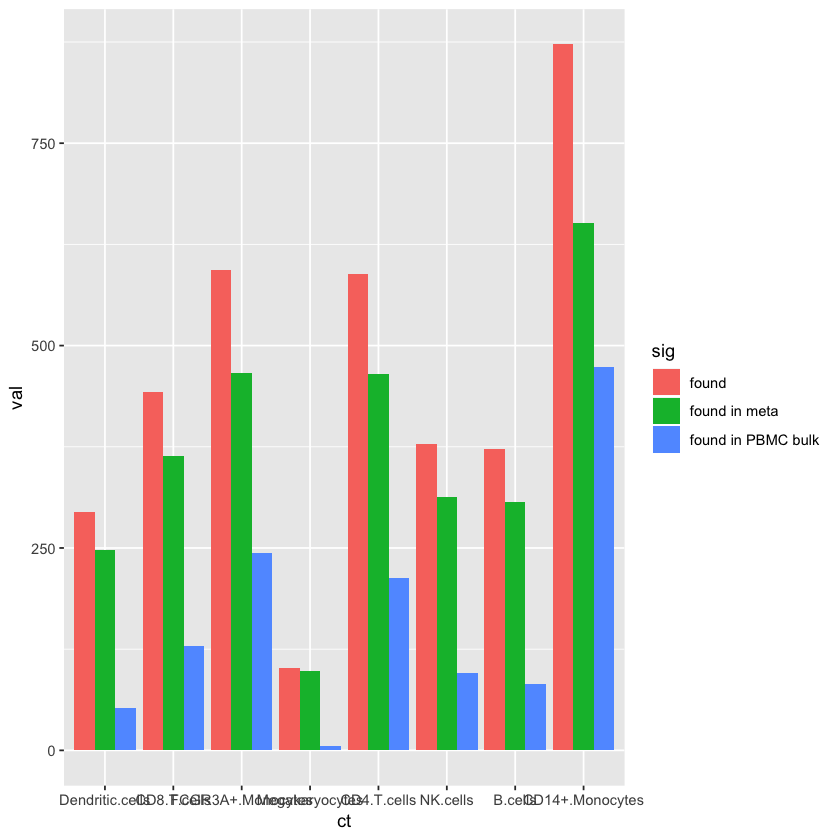

In [31]:
#are snps from one cell type found in pbmcs
meta.genes=sapply(strsplit(meta.pansig$RSID, '_'), '[', 2)
pbmc.use=sig.cts[, match('PBMC', colnames(sig.cts))]

# df=NULL
# for(ct in cts[-2]){
#     print(ct)
#     ct.use=sig.cts[, match(ct, colnames(sig.cts))]
#     found.inds=which(ct.use==1)
#     found.pbmc=length(intersect(found.inds, which(rowSums(sig.cts[found.inds, -2])==1)))
#     print(length(found.inds))
#     print(found.pbmc)
#     prop=found.pbmc/length(which(ct.use==1))
#     print(prop)
#     df.small=data.frame(ct=ct, val=c(length(found.inds), found.pbmc), sig=c('found', 'found in PBMC bulk'))
#     df=rbind(df, df.small)
# }

#ggplot(df, aes(x=ct, y=val, fill=sig)) + geom_bar(stat='identity', position='dodge') 

df=NULL
genes=sapply(strsplit(rownames(sig.cts), '_'), '[', 2)

for(ct in cts[-2]){
    print(ct)
    ct.use=sig.cts[, match(ct, colnames(sig.cts))]
    found.inds=unique(genes[which(ct.use==1)])
    found.pbmc=length(intersect(found.inds, genes[which(rowSums(sig.cts[which(genes %in% found.inds), -2])==1)]))
    found.meta=length(intersect(found.inds, meta.genes))
    print(length(found.inds))
    print(found.pbmc)
    prop=found.pbmc/length(found.inds)
    prop.2=found.meta/length(found.inds)
    print(prop)
    print(prop.2)
    df.small=data.frame(ct=ct, val=c(length(found.inds), found.pbmc, found.meta), sig=c('found', 'found in PBMC bulk', 'found in meta'))
    df=rbind(df, df.small)
}

#head(sig.cts[which(genes %in% found.inds), -2])
#print(head(genes))

#TO-DO add meta to this plot
ggplot(df, aes(x=ct, y=val, fill=sig)) + geom_bar(stat='identity', position='dodge') 

RSID,#STUDY,PVALUE_FE,BETA_FE,STD_FE,PVALUE_RE,BETA_RE,STD_RE,PVALUE_RE2,STAT1_RE2,⋯,V24,V25,V26,V27,V28,V29,V30,V31,qfdr,pfdr
6:32609545_HLA-DQA2,7,0.00000e+00,1.130310,0.0293285,7.21114e-07,2.08744,0.421230,0.00000e+00,1485.31,⋯,NA,NA,NA,NA,NA,NA,NA,NA,3.448566e-200,2.607299e-05
6:32610401_HLA-DQA2,7,0.00000e+00,1.130310,0.0293285,7.21114e-07,2.08744,0.421230,0.00000e+00,1485.31,⋯,NA,NA,NA,NA,NA,NA,NA,NA,3.448566e-200,2.607299e-05
6:32609746_HLA-DQA2,7,1.63437e-159,0.867734,0.0322446,5.21933e-06,1.86992,0.410452,1.45083e-300,724.20,⋯,NA,NA,NA,NA,NA,NA,NA,NA,2.473833e-140,1.492611e-04
6:32610403_HLA-DQA2,7,1.63437e-159,0.867734,0.0322446,5.21933e-06,1.86992,0.410452,1.45083e-300,724.20,⋯,NA,NA,NA,NA,NA,NA,NA,NA,2.473833e-140,1.492611e-04
6:32611537_HLA-DQA2,7,1.63437e-159,0.867734,0.0322446,5.21933e-06,1.86992,0.410452,1.45083e-300,724.20,⋯,NA,NA,NA,NA,NA,NA,NA,NA,2.473833e-140,1.492611e-04
6:32612161_HLA-DQA2,7,1.63437e-159,0.867734,0.0322446,5.21933e-06,1.86992,0.410452,1.45083e-300,724.20,⋯,NA,NA,NA,NA,NA,NA,NA,NA,2.473833e-140,1.492611e-04


### SNPs that are only significant in one cell type (25424/56478) mostly come from monocytes

sig.collapsed
010000001 010100001 000000001 000001000 010001000 011001000 110100001 000100000 
     6209      5771      3935      3170      2611      1975      1940      1841 
111111111 000000010 000000100 010000010 000100001 011001100 010100000 011000100 
     1759      1648      1307      1254      1219       977       854       845 
100000000 011001110 010000000 001000000 010001001 110100011 010000100 001001000 
      839       833       777       764       721       618       519       503 
110000001 111101111 001000100 010100011 011001101 011101111 011000000 011001010 
      490       456       421       396       389       370       364       361 
110110001 011001001 001001100 011001111 010101001 011101101 000001001 100000001 
      355       352       324       313       312       289       261       252 
010000011 010001010 000000011 000001010 010001100 010000101 000000110 111100011 
      249       245       214       213       210       194       193       189 
010100101 1101

[1] "Dendritic.cells"   "PBMC"              "CD8.T.cells"      
[4] "FCGR3A+.Monocytes" "Megakaryocytes"    "CD4.T.cells"      
[7] "NK.cells"          "B.cells"           "CD14+.Monocytes"

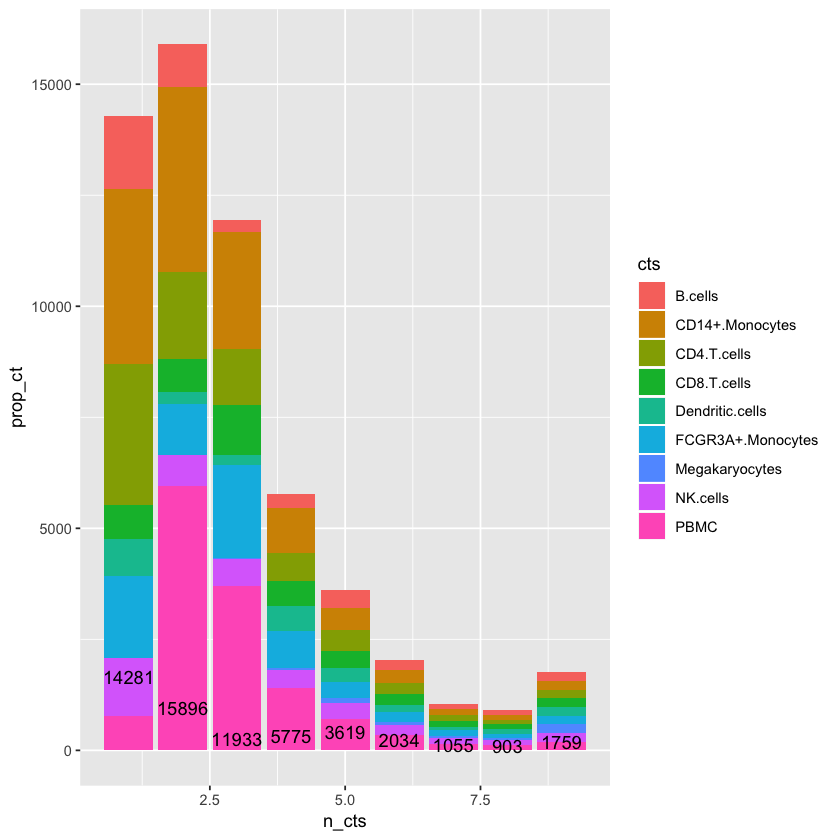

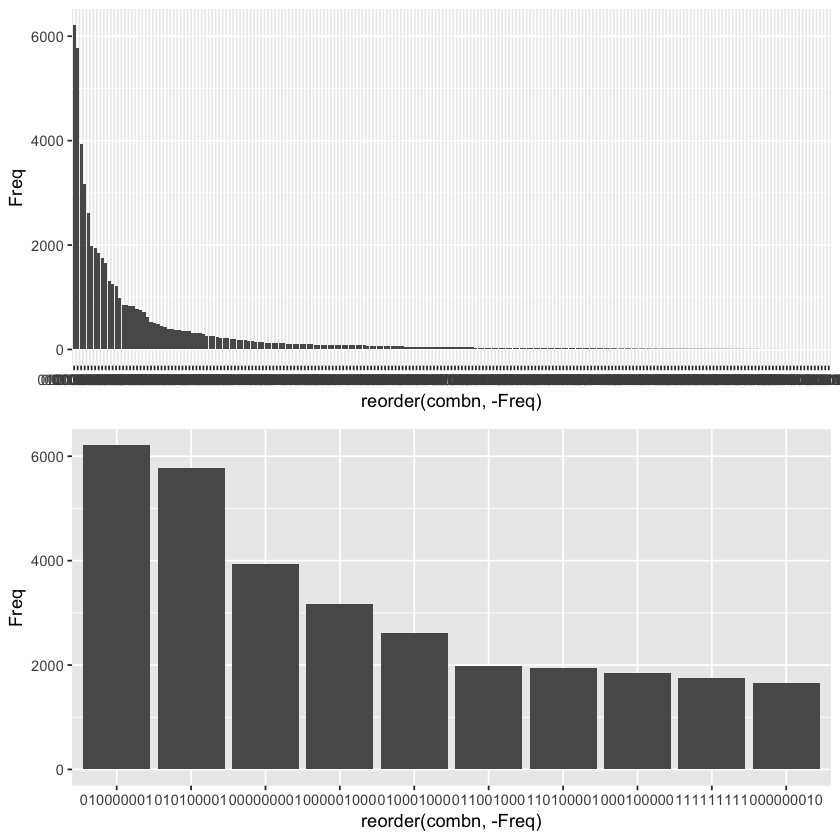

In [64]:
df.pos=df.sig.ct[which(df.sig.ct$value==1),]
#pdf('ct.het.breakdown.pdf')
ggplot(snps.df, aes(x=n_cts, y=prop_ct, fill=cts)) + geom_bar(stat='identity') + geom_text(data=subset(snps.df, cts=='B.cells'), aes(x=n_cts, y=prop_ct,label=n_snps), nudge_y=0.9)
#dev.off()
#print(head(sig.cts))


sig.collapsed<-apply(sig.cts,1,paste,collapse='')
tab.sig=table(sig.collapsed)
tab.sig[order(tab.sig, decreasing=T)]

tab.df=data.frame(combn=as.factor(names(tab.sig)), tab.sig)
tab.df.sorted=tab.df[order(tab.df$Freq, decreasing=T),][1:10, ]

colnames(sig.cts)

plt1=ggplot(tab.df.sorted, aes(x=reorder(combn, -Freq), y=Freq))+ geom_bar(stat='identity')
plt2=ggplot(tab.df, aes(x=reorder(combn, -Freq), y=Freq))+ geom_bar(stat='identity')

#pdf('freq.ct.pdf')
grid.arrange(plt2, plt1)
#dev.off()
